## EDEX Grid Inventory

In [34]:
from awips.dataaccess import DataAccessLayer

# Set host
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")

# Init data request
request = DataAccessLayer.newDataRequest()

# Set datatype
request.setDatatype("grid")

# Get a list of all available models
available_grids = DataAccessLayer.getAvailableLocationNames(request)

# Sort
available_grids.sort()

for grid in available_grids:
    print grid

AVN211
AVN225
DGEX
ECMF-Global
ECMF1
ECMF10
ECMF11
ECMF12
ECMF2
ECMF3
ECMF4
ECMF5
ECMF6
ECMF7
ECMF8
ECMF9
ETA
GFS
GFS40
GFSGuide
GFSLAMP5
HPCGuide
HPCqpfNDFD
HRRR
LAMP2p5
MRMS_1000
NAM12
NAM40
NCWF
NOHRSC-SNOW
NamDNG
NamDNG5
QPE-MSR
RAP13
RAP40
RTMA
RTMA5
URMA25
estofsPR
estofsUS


**LocationNames** is different for different plugins
- radar is icao
- satellite is sector


## Requesting a Grid

In [35]:
# Grid request
request.setLocationNames('RAP40')
request.setParameters("RH")
request.setLevels("850MB")

# Get available times
t = DataAccessLayer.getAvailableTimes(request)

# Select last available time [-1]
response = DataAccessLayer.getGridData(request, [t[0]])
data = response[0]
lon,lat = data.getLatLonCoords()

# Print info
print 'Time :', t[-1]
print 'Model:', data.getLocationName()
print 'Unit :', data.getUnit()
print 'Parm :', data.getParameter()

# Print data array
print data.getRawData().shape
print data.getRawData()
print "lat array =", lat
print "lon array =", lon


Time : 2016-02-23 15:00:00 (12)
Model: RAP40
Unit : %
Parm : RH
(151, 113)
[[ 93.05456543  93.05456543  87.05456543 ...,  73.05456543  72.05456543
   71.05456543]
 [ 70.05456543  70.05456543  67.05456543 ...,  69.05456543  46.05456924
   37.05456924]
 [ 40.05456924  56.05456924  68.05456543 ...,  51.05456924  73.05456543
   74.05456543]
 ..., 
 [ 65.05456543  62.05456924  63.05456924 ...,  67.05456543  65.05456543
   46.05456924]
 [ 48.05456924  59.05456924  62.05456924 ...,   4.05456877   5.05456877
    5.05456877]
 [  7.05456877   8.05456829  10.05456829 ...,  91.05456543  95.05456543
   95.05456543]]
lat array = [[ 54.24940109  54.35071945  54.45080566 ...,  57.9545517   57.91926193
   57.88272858]
 [ 57.84495163  57.80593109  57.76566696 ...,  58.07667542  58.08861542
   58.09931183]
 [ 58.10876846  58.11697769  58.12394714 ...,  56.40270996  56.46187973
   56.51980972]
 ..., 
 [ 19.93209648  19.89832115  19.86351395 ...,  20.054636    20.06362152
   20.07156372]
 [ 20.0784626   20

## Plotting a Grid with Basemap

Using **matplotlib**, **numpy**, and **basemap**:

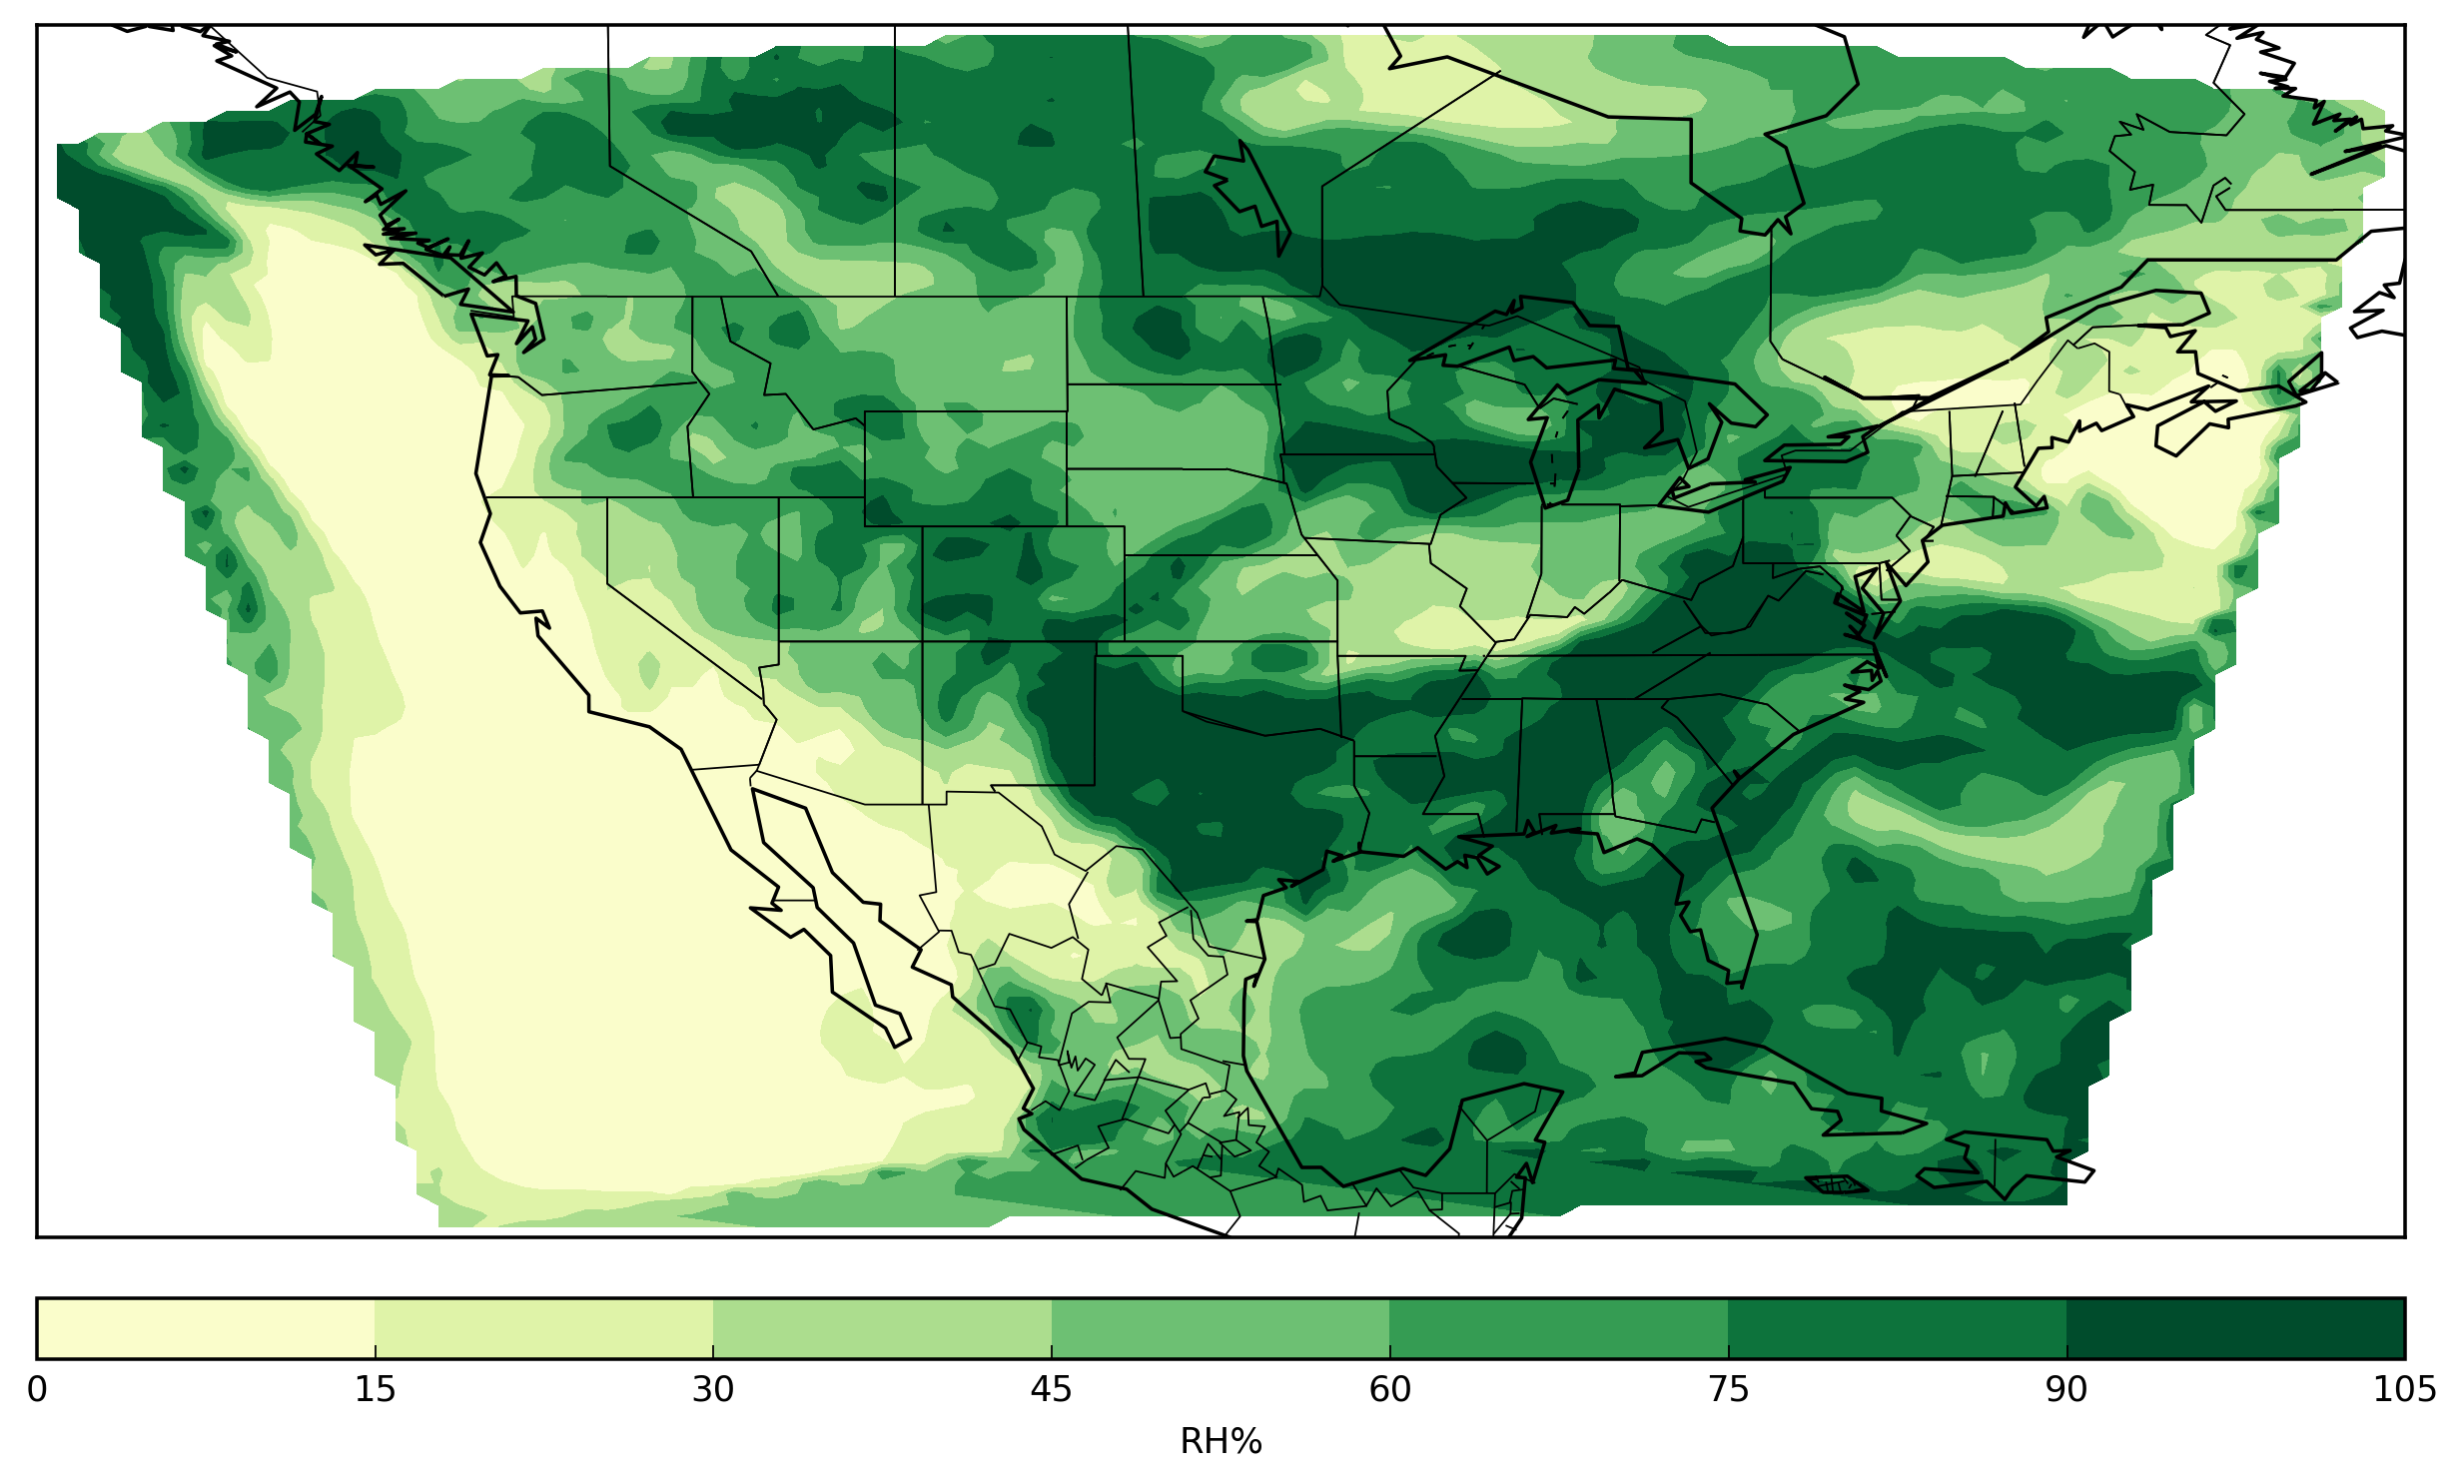

In [36]:
import matplotlib.tri as mtri
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
from mpl_toolkits.basemap import Basemap, cm
import numpy as np
from numpy import linspace, transpose
from numpy import meshgrid


plt.figure(figsize=(12, 12), dpi=100)
lons,lats = data.getLatLonCoords()

map = Basemap(projection='cyl',
      resolution = 'c',
      llcrnrlon = lons.min(), llcrnrlat = lats.min(),
      urcrnrlon =lons.max(), urcrnrlat = lats.max()
)
map.drawcoastlines()
map.drawstates()
map.drawcountries()

# 
# We have to reproject our grid, see https://stackoverflow.com/questions/31822553/m
#
x = linspace(0, map.urcrnrx, data.getRawData().shape[1])
y = linspace(0, map.urcrnry, data.getRawData().shape[0])
xx, yy = meshgrid(x, y)
ngrid = len(x)
rlons = np.repeat(np.linspace(np.min(lons), np.max(lons), ngrid),
          ngrid).reshape(ngrid, ngrid)
rlats = np.repeat(np.linspace(np.min(lats), np.max(lats), ngrid),
          ngrid).reshape(ngrid, ngrid).T
tli = mtri.LinearTriInterpolator(mtri.Triangulation(lons.flatten(),
          lats.flatten()), data.getRawData().flatten())
rdata = tli(rlons, rlats)
cs = map.contourf(rlons, rlats, rdata, latlon=True, vmin=0, vmax=100, cmap='YlGn')

# add colorbar.
cbar = map.colorbar(cs,location='bottom',pad="5%")
cbar.set_label(data.getParameter() + data.getUnit() )

# Show plot
plt.show()


or use **pcolormesh** rather than **contourf**

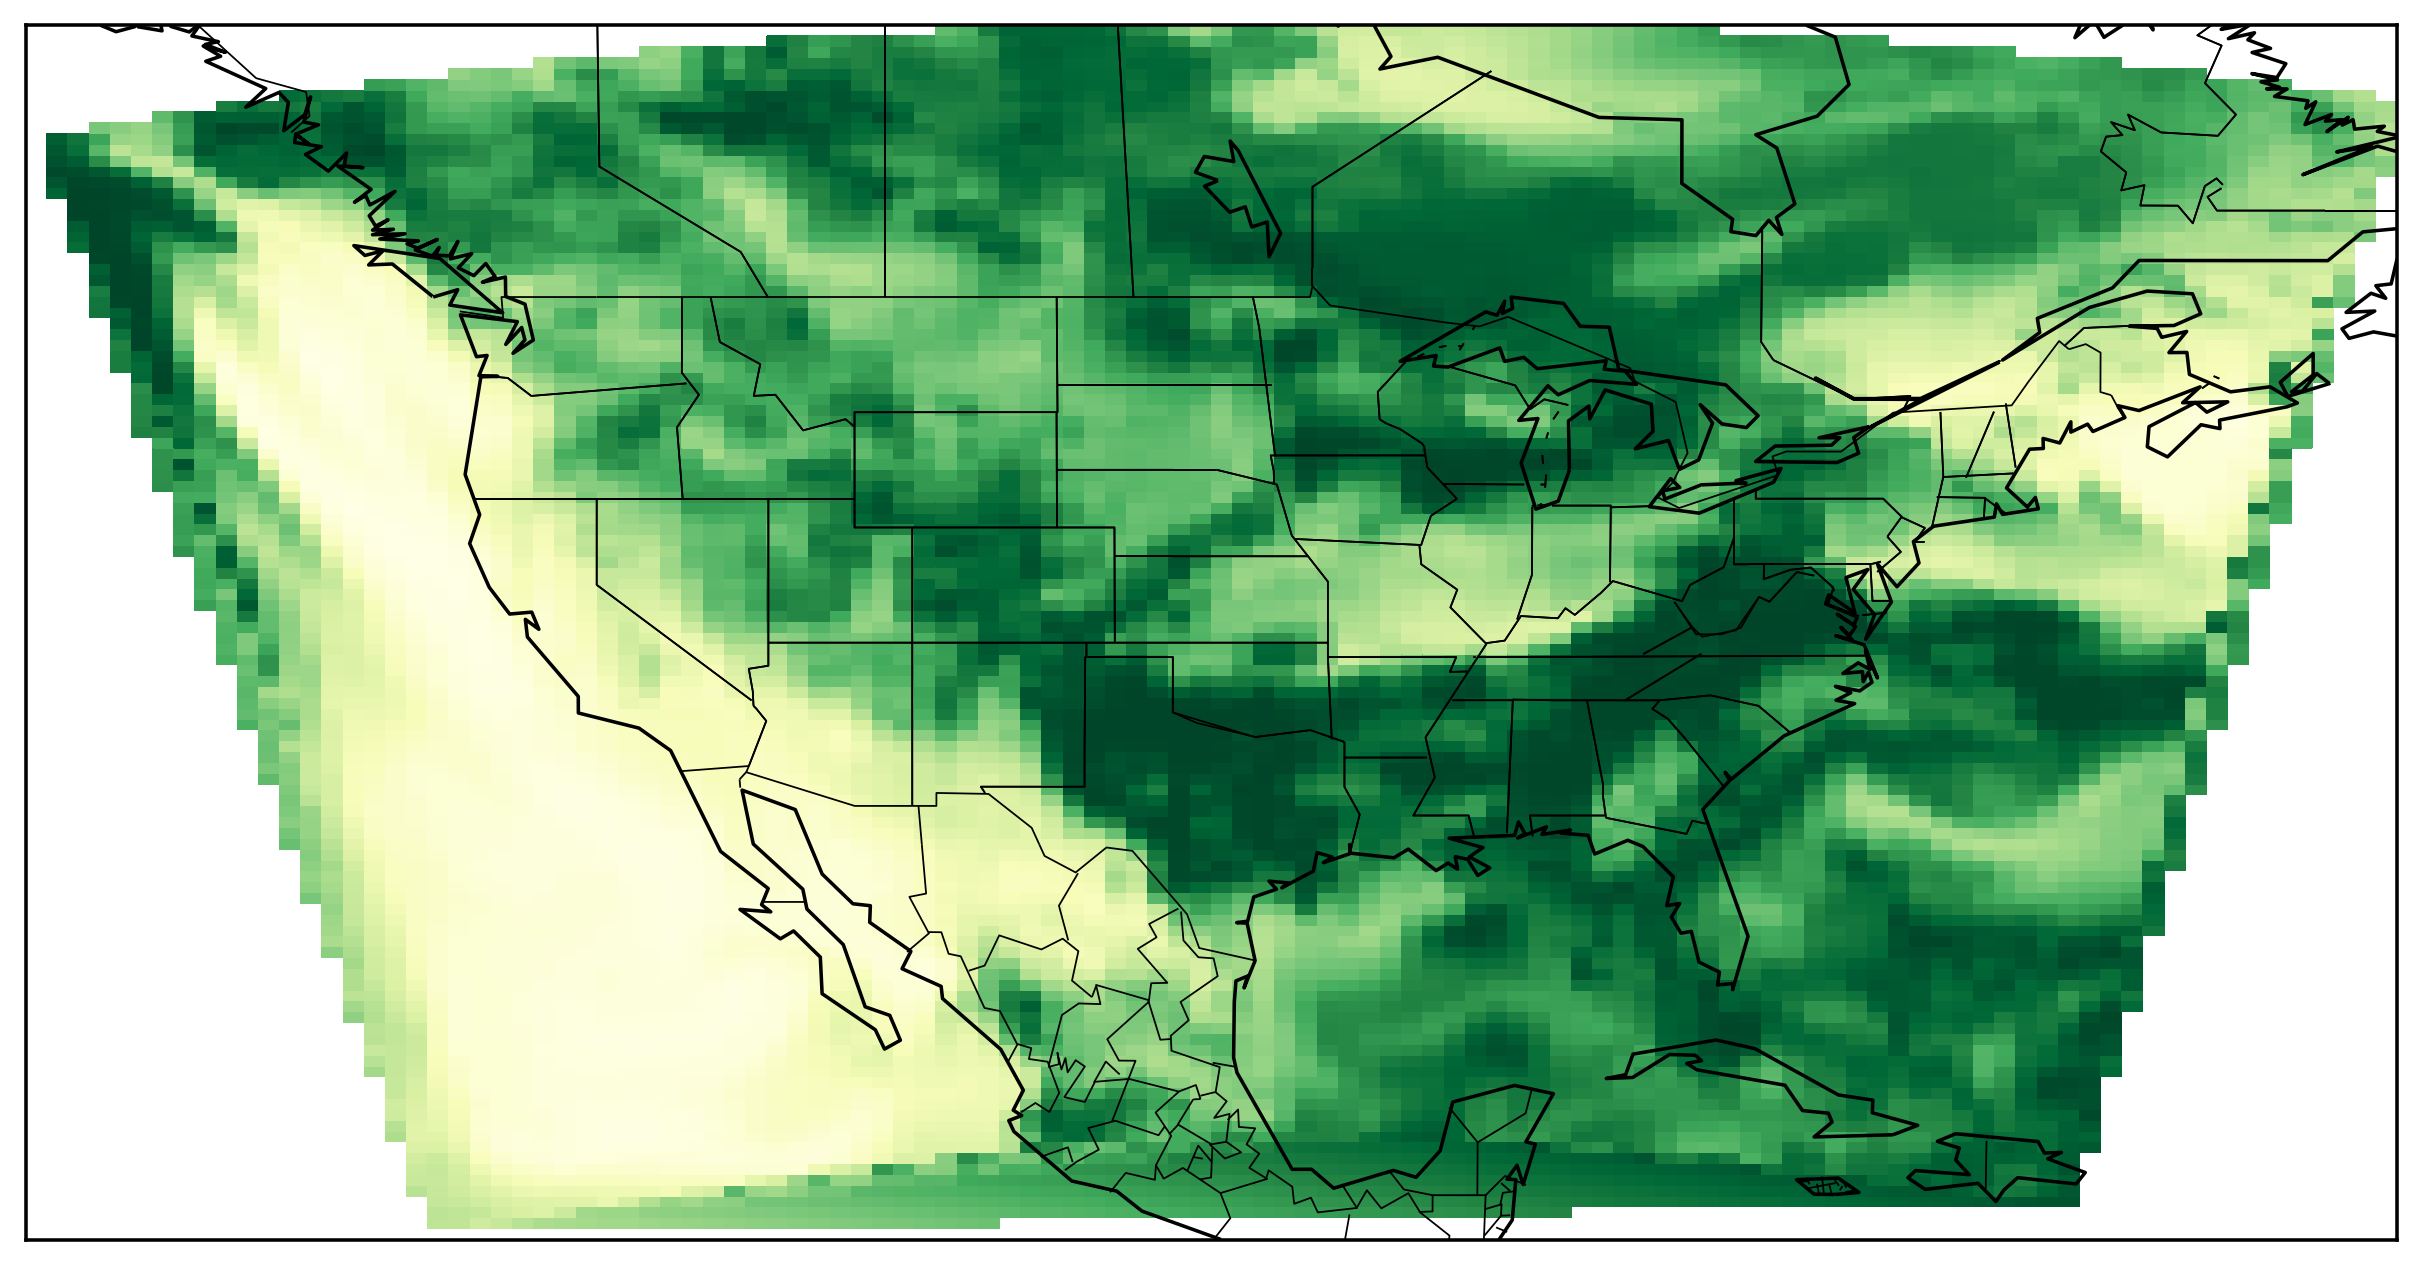

In [37]:
plt.figure(figsize=(12, 12), dpi=100)
map = Basemap(projection='cyl',
      resolution = 'c',
      llcrnrlon = lons.min(), llcrnrlat = lats.min(),
      urcrnrlon =lons.max(), urcrnrlat = lats.max()
)
map.drawcoastlines()
map.drawstates()
map.drawcountries()
cs = map.pcolormesh(rlons, rlats, rdata, latlon=True, vmin=0, vmax=100, cmap='YlGn')

## Plotting a Grid with Cartopy

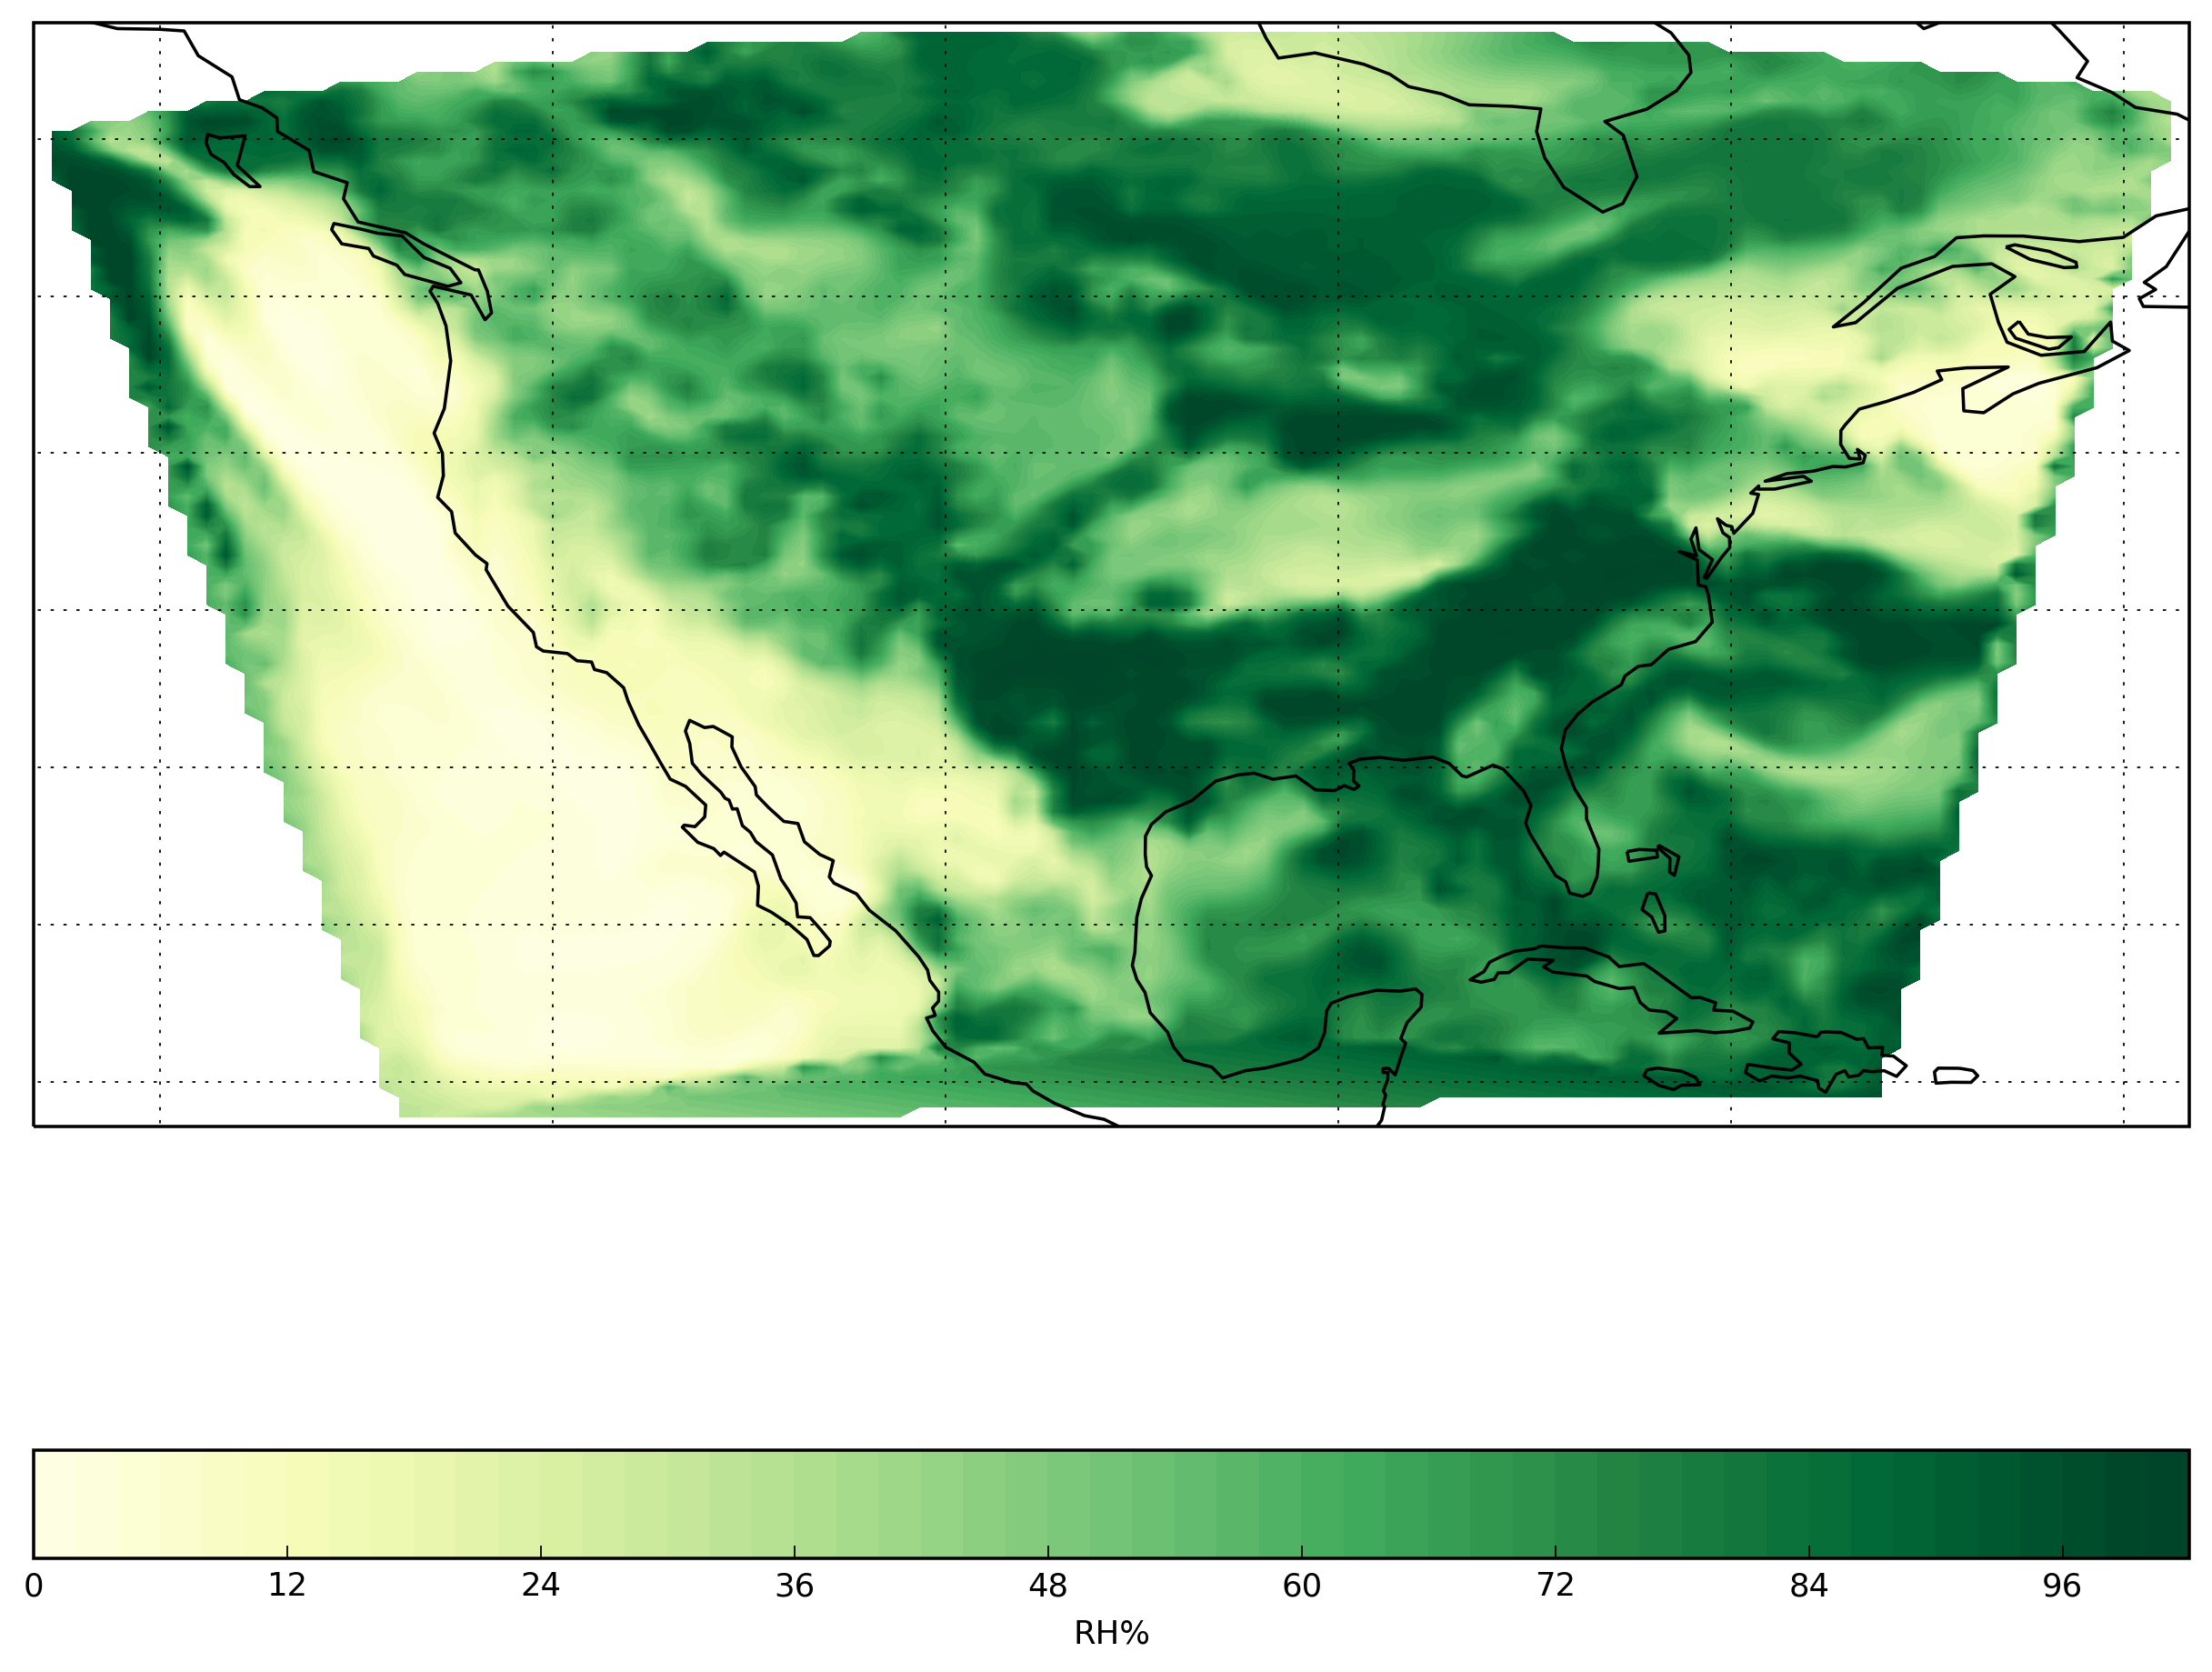

In [38]:
import os
import matplotlib.pyplot as plt
import numpy as np
import iris
import cartopy.crs as ccrs
from cartopy import config

lon,lat = data.getLatLonCoords()
plt.figure(figsize=(12, 12), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())
cs = plt.contourf(rlons, rlats, rdata, 60, transform=ccrs.PlateCarree(), vmin=0, vmax=100, cmap='YlGn')
ax.coastlines()
ax.gridlines()

# add colorbar
cbar = plt.colorbar(orientation='horizontal')
cbar.set_label(data.getParameter() + data.getUnit() )
plt.show()